# Clase 1: Del texto al vector.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

## Extracción de datos

In [86]:
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [87]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [88]:
# Carga de los datos.

categories = ['alt.atheism', 'sci.space']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
texts = data.data
labels = data.target
target_names = data.target_names

In [89]:
# Plot general para los datos
def plot_representation(data_2d, labels, title):
    plt.figure(figsize=(10, 7))
    for label_idx in range(len(categories)):
        indices = np.where(labels == label_idx)
        plt.scatter(data_2d[indices, 0], data_2d[indices, 1], 
                    label=target_names[label_idx], alpha=0.7, edgecolors='w')
    
    plt.title(f"Representación: {title}", fontsize=14)
    plt.xlabel("Dimensión Latente 1")
    plt.ylabel("Dimensión Latente 2")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

## Bag of Words.

In [90]:
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(texts)

In [91]:
bow_matrix.shape

(1073, 17919)

In [92]:
bow_2d = TruncatedSVD(n_components=2).fit_transform(bow_matrix)
bow_2d.shape

(1073, 2)

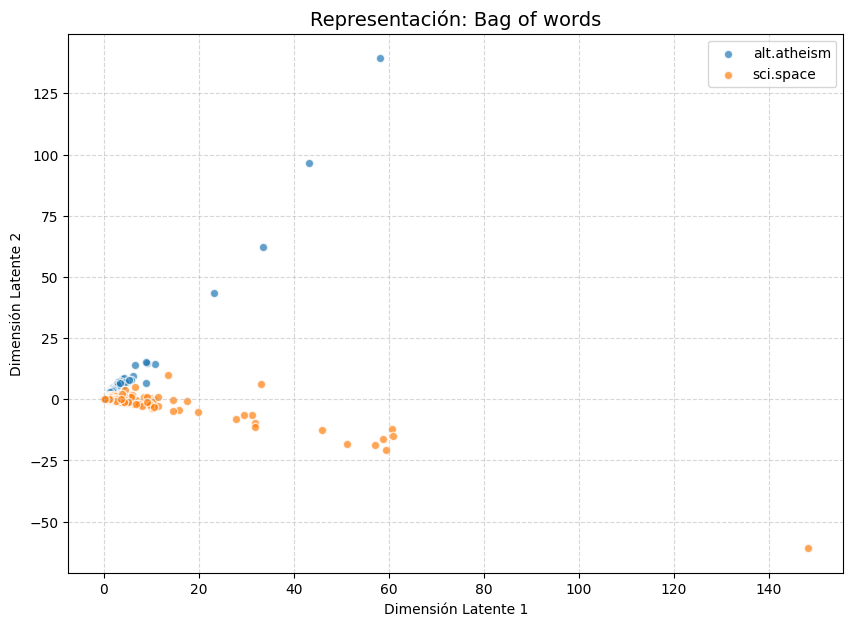

In [93]:
plot_representation(bow_2d,labels,"Bag of words")

## TF-IDF

In [94]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

In [95]:
tfidf_matrix.shape

(1073, 17919)

In [96]:
tfidf_2d = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix)
tfidf_2d

array([[ 0.14061573, -0.13416632],
       [ 0.1307517 ,  0.0945283 ],
       [ 0.09564489,  0.05347427],
       ...,
       [ 0.06554013, -0.00545783],
       [ 0.09948269,  0.05851512],
       [ 0.0597682 ,  0.00683355]], shape=(1073, 2))

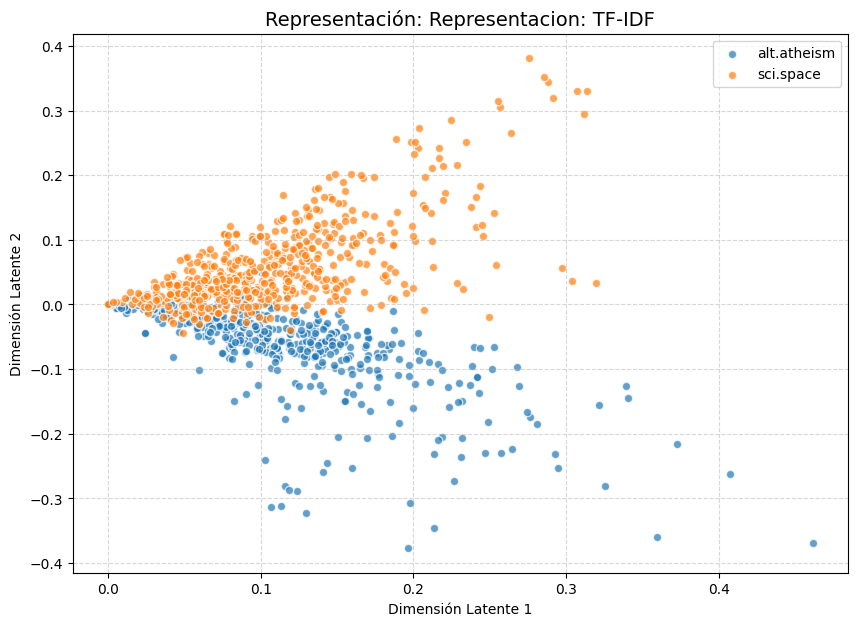

In [97]:
plot_representation(tfidf_2d,labels,"Representacion: TF-IDF")

## LSA

In [98]:
# Es practicamente lo que hicimos arriba
lsa_model = TruncatedSVD(n_components=100)
lsa_low_dim = lsa_model.fit_transform(tfidf_matrix)
lsa_2d = TruncatedSVD(n_components=2).fit_transform(lsa_low_dim)

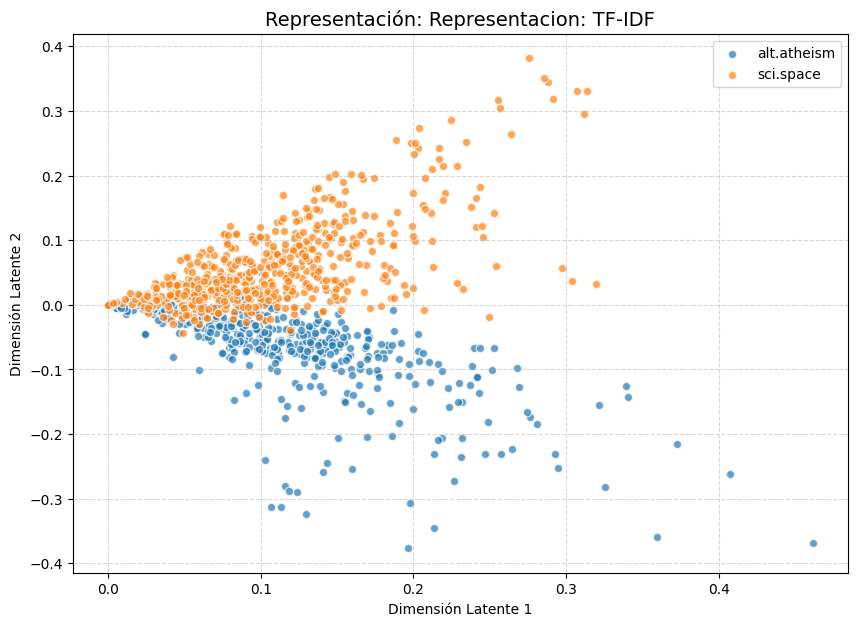

In [99]:
plot_representation(lsa_2d,labels,"Representacion: TF-IDF")

## W2V

In [100]:
# Tokenizacion de texto
nltk.download('punkt')
tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [101]:
def get_doc_vector(w2v_model,tokens):
    vecs = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(100)

In [102]:
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

In [103]:
w2v_matrix = np.array([get_doc_vector(w2v_model,t) for t in tokenized_texts])
w2v_2d = TruncatedSVD(n_components=2).fit_transform(w2v_matrix)
w2v_2d

array([[ 4.44701604,  0.15445769],
       [ 4.40028393, -0.08139015],
       [ 4.09337574,  0.05271265],
       ...,
       [ 5.87464414, -4.03382051],
       [ 3.47245979, -0.30795088],
       [ 4.1651954 , -0.2786288 ]], shape=(1073, 2))

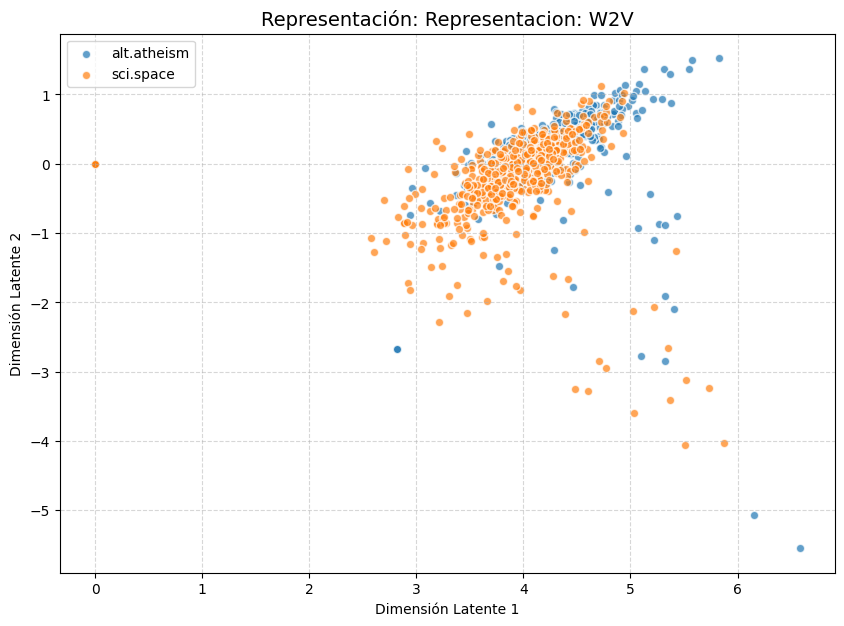

In [104]:
plot_representation(w2v_2d,labels,"Representacion: W2V")